In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df_imported = pd.read_csv('df.csv', index_col=0)
df_imported = df_imported
df_imported.index = pd.to_datetime(df_imported.index)
df = pd.DataFrame()
df['Microwave'] = df_imported['Microwave']
df['Default'] = df_imported['Default']
df['Ground Truth'] = df_imported['Ground Truth']
df['Microwave - Default (combined)'] = 'temporary'
df['Garage door'] = df_imported['Garage door']

df =df.mask(df==0.9, 1)
df =df.mask(df==0.1, 0)

mask1 = (df['Microwave']==1.0) & (df['Default']==1.0)
mask2 = (df['Microwave']==0.0) & (df['Default']==1.0)
mask3 = (df['Microwave']==0.0) & (df['Default']==0.0)
mask4 = (df['Microwave']==1.0) & (df['Default']==0.0)

df['Microwave - Default (combined)'] = ''
df['Microwave - Default (combined)'] = df['Microwave - Default (combined)'].mask(mask1, '11')
df['Microwave - Default (combined)'] = df['Microwave - Default (combined)'].mask(mask2, '01')
df['Microwave - Default (combined)'] = df['Microwave - Default (combined)'].mask(mask3, '00')
df['Microwave - Default (combined)'] = df['Microwave - Default (combined)'].mask(mask4, '10')
df.iloc[8640:10080]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-07 05:00:00,0.0,1.0,1.0,01,0.0
2016-01-07 05:01:00,0.0,1.0,1.0,01,0.0
2016-01-07 05:02:00,0.0,1.0,1.0,01,0.0
2016-01-07 05:03:00,0.0,1.0,1.0,01,0.0
2016-01-07 05:04:00,0.0,1.0,1.0,01,0.0
...,...,...,...,...,...
2016-01-08 04:55:00,0.0,1.0,1.0,01,0.0
2016-01-08 04:56:00,0.0,1.0,1.0,01,0.0
2016-01-08 04:57:00,0.0,1.0,1.0,01,0.0
2016-01-08 04:58:00,0.0,1.0,1.0,01,0.0


In [3]:
c_00 = (df["Microwave - Default (combined)"] == "00").sum()
c_01 = (df["Microwave - Default (combined)"] == "01").sum()
c_10 = (df["Microwave - Default (combined)"] == "10").sum()
c_11 = (df["Microwave - Default (combined)"] == "11").sum()

In [4]:
df['Ground Truth'] = df['Ground Truth'].astype(int)

In [5]:
print(c_00 + c_01 + c_10 + c_11)

503910


In [6]:
df = df.iloc[:10080,:]

In [7]:
df.head()

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 05:00:00,0.0,1.0,1,01,0.0
2016-01-01 05:01:00,0.0,1.0,1,01,0.0
2016-01-01 05:02:00,0.0,1.0,1,01,0.0
2016-01-01 05:03:00,0.0,1.0,1,01,0.0
2016-01-01 05:04:00,0.0,1.0,1,01,0.0


# Observable state -> Observable state

### Unconditonal histogram

<AxesSubplot: xlabel='Microwave - Default (combined)', ylabel='Count'>

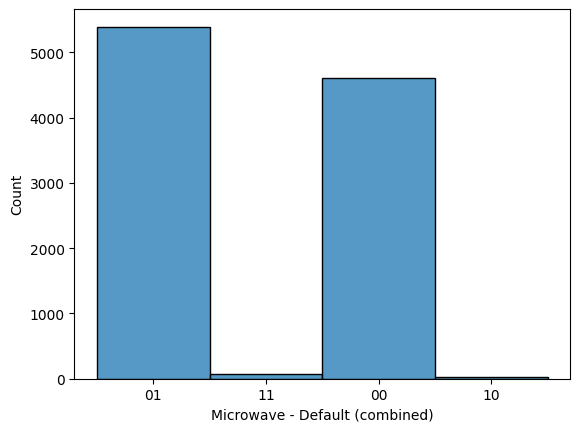

In [8]:
sns.histplot(data=df, x="Microwave - Default (combined)")

### One step in the past

In [9]:
mask = np.zeros((4,4))

o_states = ['00', '01', '10', '11']

for idx, st in enumerate(o_states):
    for i in range(len(df)-1):
        mask[0,idx] = int((df.iloc[i, 3] == o_states[0]) & (df.iloc[i+1, 3] == st)) + mask[0,idx]
        mask[1,idx] = int((df.iloc[i, 3] == o_states[1]) & (df.iloc[i+1, 3] == st)) + mask[1,idx]
        mask[2,idx] = int((df.iloc[i, 3] == o_states[2]) & (df.iloc[i+1, 3] == st)) + mask[2,idx]
        mask[3,idx] = int((df.iloc[i, 3] == o_states[3]) & (df.iloc[i+1, 3] == st)) + mask[3,idx]


In [10]:
print(mask)

[[4584.    7.   10.    0.]
 [   7. 5355.    0.   29.]
 [  10.    0.    9.    0.]
 [   0.   29.    0.   39.]]


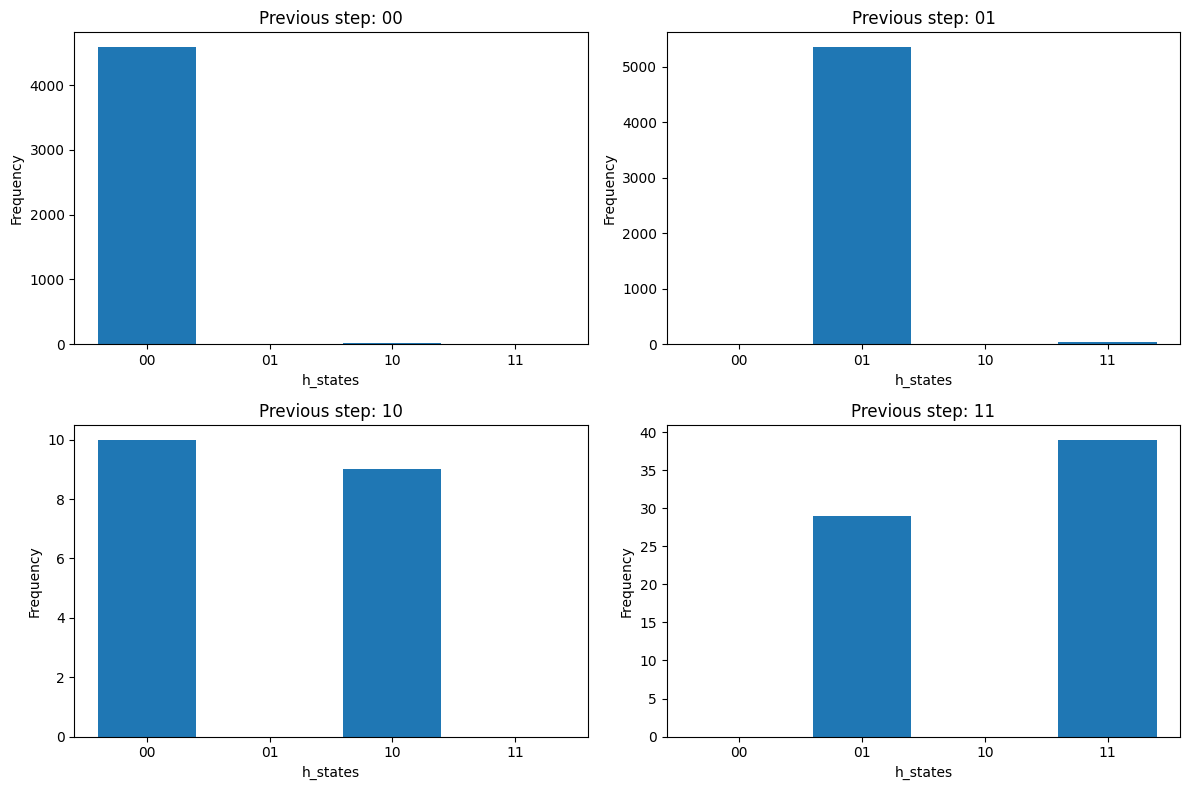

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    row = i // 2
    col = i % 2
    axs[row, col].bar(o_states, mask[i, :])
    axs[row, col].set_title("Previous step: " + str(o_states[i]))
    axs[row, col].set_xlabel("h_states")
    axs[row, col].set_ylabel("Frequency")


plt.tight_layout()

### Two steps in the past

In [12]:
mask = np.zeros((4,4,4))

o_states = ['00', '01', '10', '11']

for i in range(len(df)-2):
    for idx, st in enumerate(o_states):
        for idx_2, st_2 in enumerate(o_states):
            mask[0, idx, idx_2] = int((df.iloc[i, 3] == o_states[0]) & (df.iloc[i+1, 3] == st) & (df.iloc[i+2, 3] == st_2)) + mask[0, idx, idx_2]
            mask[1, idx, idx_2] = int((df.iloc[i, 3] == o_states[1]) & (df.iloc[i+1, 3] == st) & (df.iloc[i+2, 3] == st_2)) + mask[1, idx, idx_2]
            mask[2, idx, idx_2] = int((df.iloc[i, 3] == o_states[2]) & (df.iloc[i+1, 3] == st) & (df.iloc[i+2, 3] == st_2)) + mask[2, idx, idx_2]
            mask[3, idx, idx_2] = int((df.iloc[i, 3] == o_states[3]) & (df.iloc[i+1, 3] == st) & (df.iloc[i+2, 3] == st_2)) + mask[3, idx, idx_2]


       

In [13]:
str = df.iloc[0,3]
l=[str]*4
l = np.array(l)
print((l==o_states).astype(int))


[0 1 0 0]


In [14]:
print(len(mask.shape))

3


In [15]:
print(mask)

[[[4.567e+03 7.000e+00 1.000e+01 0.000e+00]
  [0.000e+00 7.000e+00 0.000e+00 0.000e+00]
  [6.000e+00 0.000e+00 4.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00]]

 [[7.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [7.000e+00 5.320e+03 0.000e+00 2.700e+01]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 7.000e+00 0.000e+00 2.200e+01]]

 [[1.000e+01 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [4.000e+00 0.000e+00 5.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00]]

 [[0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 2.700e+01 0.000e+00 2.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 2.200e+01 0.000e+00 1.700e+01]]]


TypeError: 'str' object is not callable

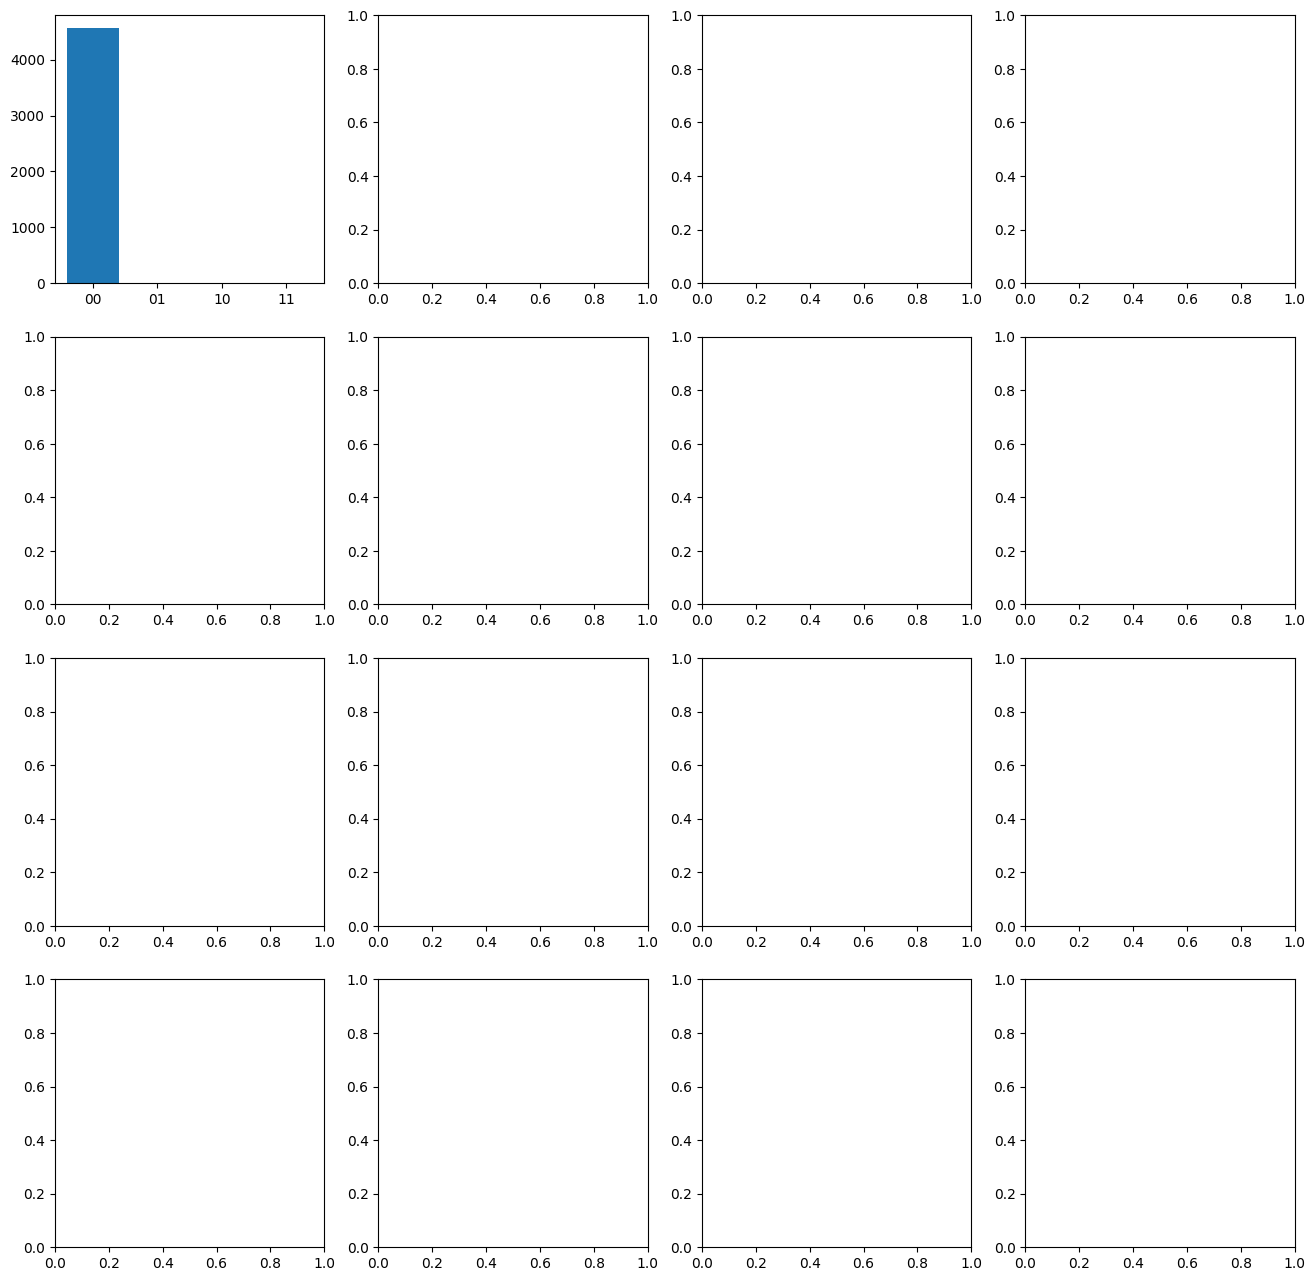

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Plot each pair of states from the mask array in a separate subplot
for i in range(4):
    for j in range(4):
        axs[i, j].bar(o_states, mask[i, j, :])
        axs[i, j].set_title("Previous steps: " + str(o_states[i]) + " " + str(o_states[j]))
        axs[i, j].set_xlabel("h_states")
        axs[i, j].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Hidden state -> Observable state

### Unconditional

<AxesSubplot: xlabel='Ground Truth', ylabel='Count'>

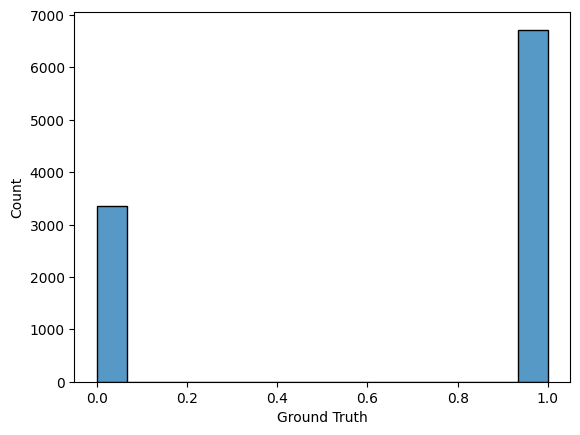

In [ ]:
sns.histplot(data=df, x="Ground Truth")

### Hidden step in the past

In [17]:
mask = np.zeros((2,4))

o_states = ['00', '01', '10', '11']
h_states = [0, 1]

for idx, st in enumerate(o_states):
    for i in range(len(df)-1):
        mask[0,idx] = int((df.iloc[i, 2] == h_states[0]) & (df.iloc[i, 3] == st) ) + mask[0,idx]
        mask[1,idx] = int((df.iloc[i, 2] == h_states[1]) & (df.iloc[i, 3] == st)) + mask[1,idx]
        

In [18]:
print(mask)

[[3341.    0.   19.    0.]
 [1260. 5391.    0.   68.]]


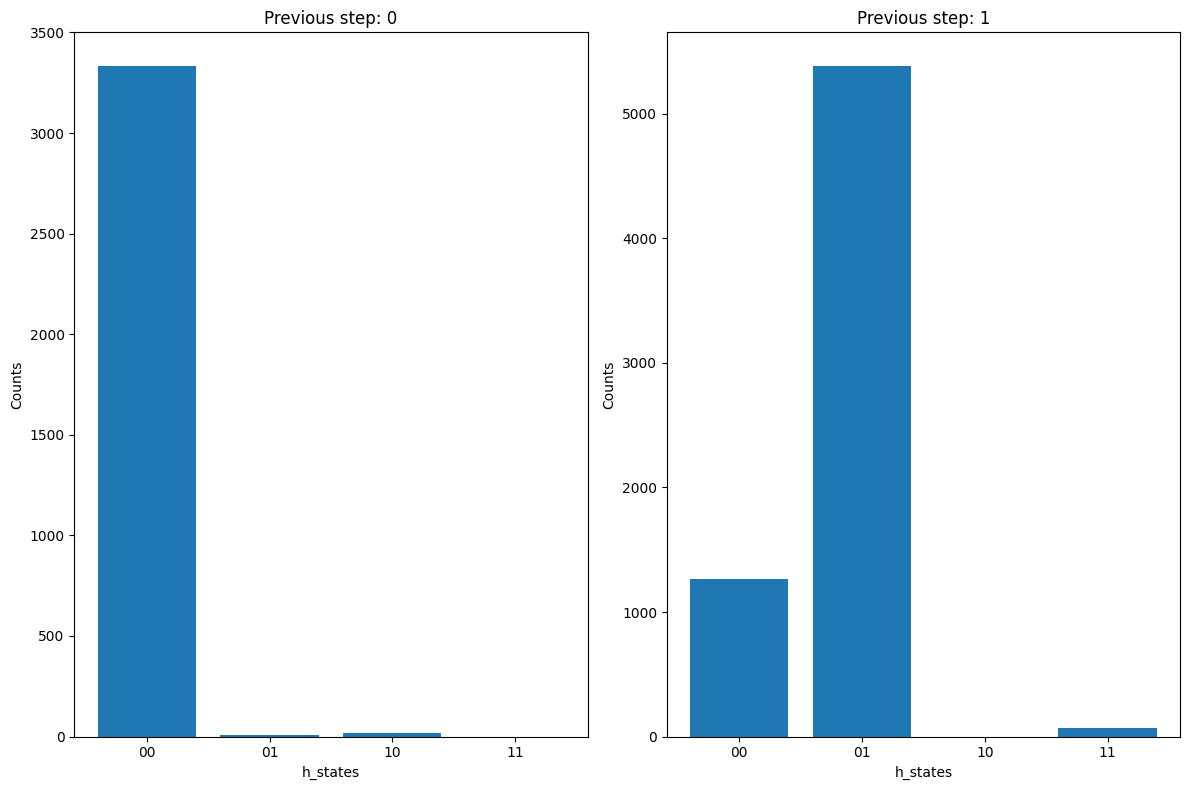

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
for i in range(2):
    col = i % 2
    axs[col].bar(o_states, mask[i, :])
    axs[col].set_title("Previous step: " + str(h_states[i]))
    axs[col].set_xlabel("h_states")
    axs[col].set_ylabel("Counts")


plt.tight_layout()

### Two hidden steps in the past

In [ ]:
mask = np.zeros((2,2,4))

o_states = ['00', '01', '10', '11']
h_states = [0, 1]

for idx, st in enumerate(h_states):
    for idx_2, st_2 in enumerate(o_states):
        for i in range(len(df)-1):
            mask[0,idx, idx_2] = int((df.iloc[i, 2] == h_states[0]) & (df.iloc[i+1, 2] == st)& (df.iloc[i+1, 3] == st_2)) + mask[0, idx, idx_2]
            mask[1,idx, idx_2] = int((df.iloc[i, 2] == h_states[1]) & (df.iloc[i+1, 2] == st)& (df.iloc[i+1, 3] == st_2)) + mask[1, idx, idx_2]

In [ ]:
print(mask)

[[[3327.    0.   19.    0.]
  [   7.    7.    0.    0.]]

 [[  14.    0.    0.    0.]
  [1253. 5384.    0.   68.]]]


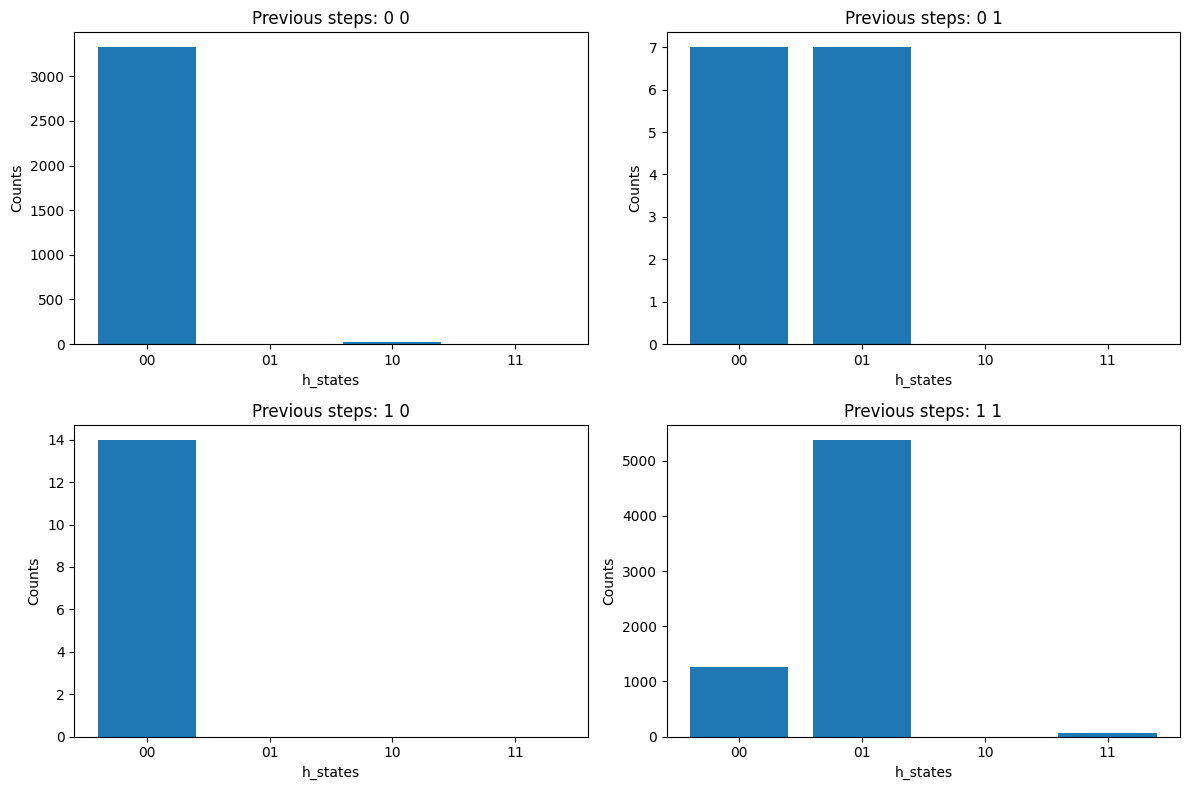

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(2):
    for j in range(2):
        axs[i, j].bar(o_states, mask[i, j, :])
        axs[i, j].set_title(
            "Previous steps: " + str(h_states[i]) + " " + str(h_states[j])
        )
        axs[i, j].set_xlabel("h_states")
        axs[i, j].set_ylabel("Counts")

plt.tight_layout()
plt.show()

# Hidden state -> Hidden state

### One step in the past

In [ ]:
mask = np.zeros((2,2))

h_states = [0, 1]

for idx, st in enumerate(h_states):
    for i in range(len(df)-1):
        mask[0,idx] = int((df.iloc[i, 2] == h_states[0]) & (df.iloc[i+1, 2] == st)) + mask[0,idx]
        mask[1,idx] = int((df.iloc[i, 2] == h_states[1]) & (df.iloc[i+1, 2] == st)) + mask[1,idx]

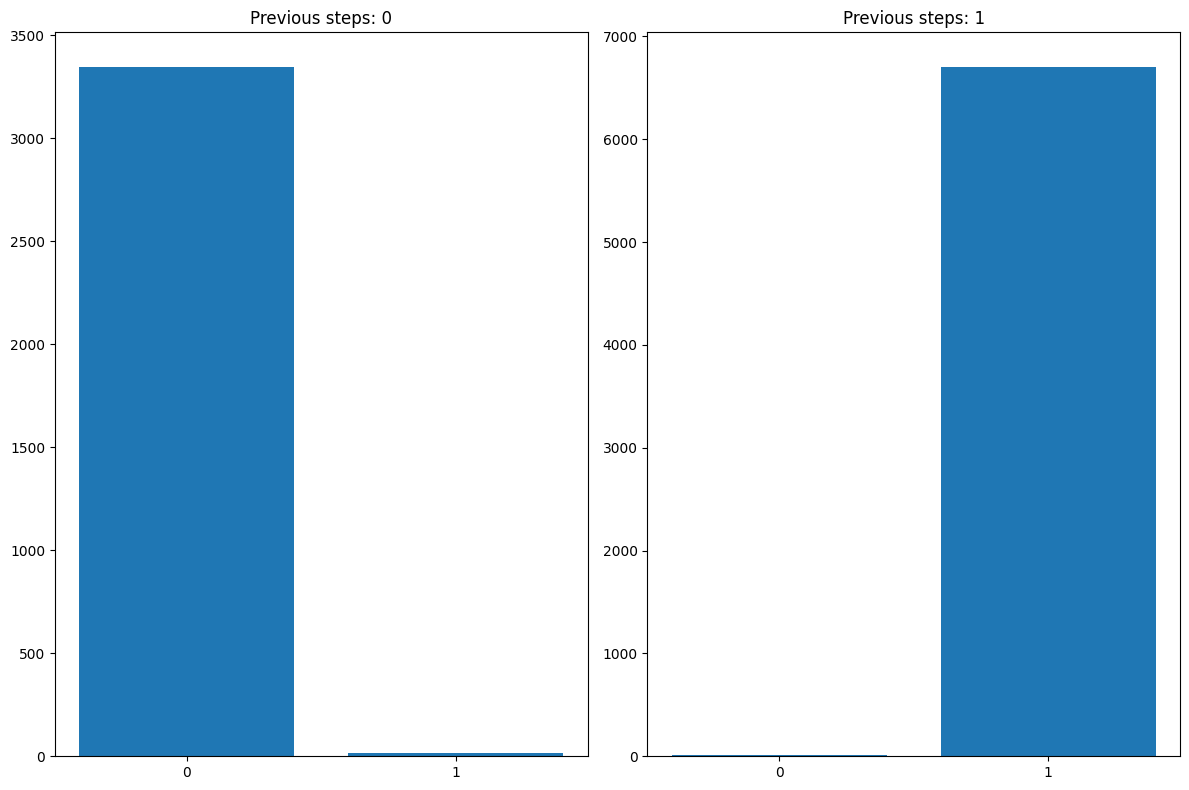

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))


for j in range(2):
    axs[j].bar(h_states, mask[j, :])
    axs[j].set_title("Previous steps: " + str(h_states[j]))
    axs[j].set_xticks(h_states)
    axs[j].set_xticklabels(["0", "1"])
    

plt.tight_layout()
plt.show()

### Two steps in the past

In [ ]:
mask = np.zeros((2,2,2))


h_states = [0, 1]

for idx, st in enumerate(h_states):
    for idx_2, st_2 in enumerate(h_states):
        for i in range(len(df)-1):
            mask[0,idx, idx_2] = int((df.iloc[i, 2] == h_states[0]) & (df.iloc[i+1, 2] == st)& (df.iloc[i+1, 2] == st_2)) + mask[0, idx, idx_2]
            mask[1,idx, idx_2] = int((df.iloc[i, 2] == h_states[1]) & (df.iloc[i+1, 2] == st)& (df.iloc[i+1, 2] == st_2)) + mask[1, idx, idx_2]

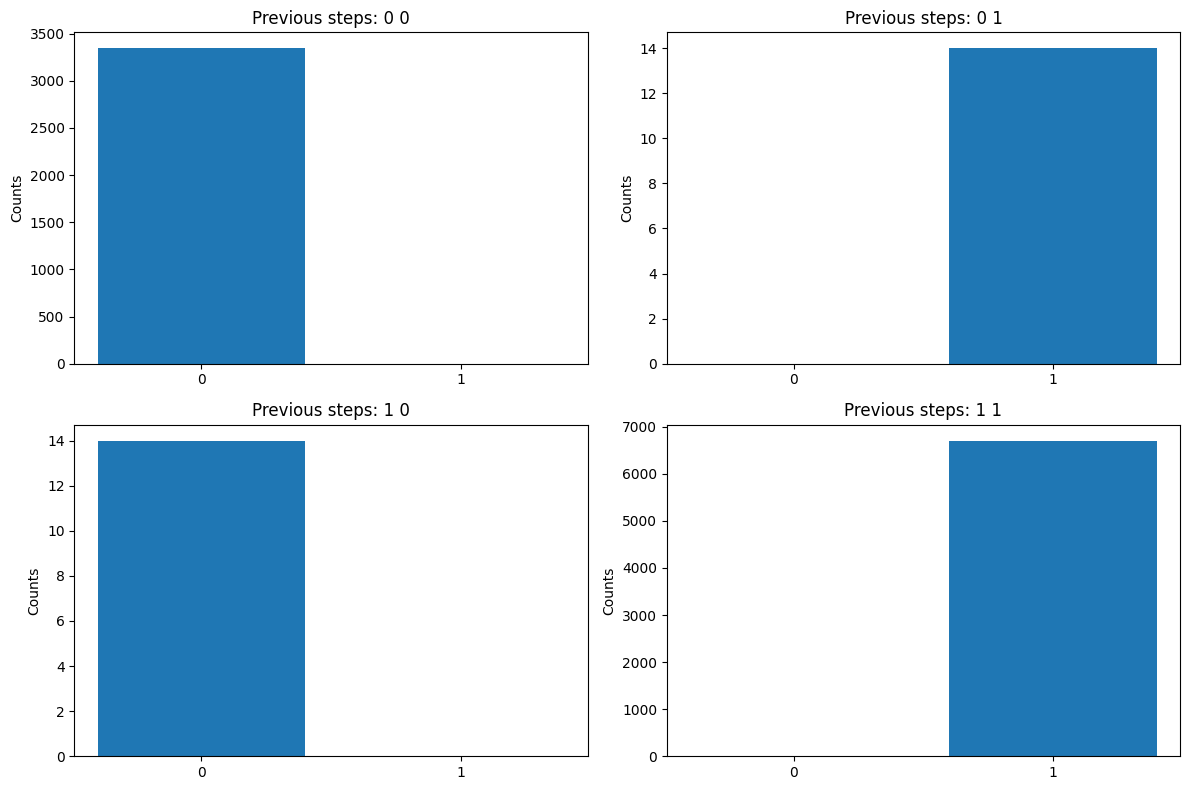

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(2):
    for j in range(2):
        axs[i, j].bar(h_states, mask[i, j, :])
        axs[i, j].set_title(
            "Previous steps: " + str(h_states[i]) + " " + str(h_states[j])
        )
        axs[i,j].set_xticks(h_states)
        axs[i,j].set_xticklabels(["0", "1"])
        axs[i, j].set_ylabel("Counts")

plt.tight_layout()
plt.show()

### Three steps in the past

In [21]:
mask = np.zeros((2, 2, 2, 2))


h_states = [0, 1]


for idx, st in enumerate(h_states):
    for idx_2, st_2 in enumerate(h_states):
        for idx_3, st_3 in enumerate(h_states):
            for i in range(len(df) - 1):
                mask[0, idx, idx_2] = (
                    int(
                        (df.iloc[i, 2] == h_states[0])
                        & (df.iloc[i + 1, 2] == st)
                        & (df.iloc[i + 1, 2] == st_2)
                        & (df.iloc[i + 1, 2] == st_3)
                    )
                    + mask[0, idx, idx_2, idx_3]
                )
                mask[1, idx, idx_2] = (
                    int(
                        (df.iloc[i, 2] == h_states[1])
                        & (df.iloc[i + 1, 2] == st)
                        & (df.iloc[i + 1, 2] == st_2)
                        & (df.iloc[i + 1, 2] == st_2)
                    )
                    + mask[1, idx, idx_2, idx_3]
                )

In [22]:
print(mask)

[[[[ 3346.  3346.]
   [    0.     0.]]

  [[    0.     0.]
   [   14.    14.]]]


 [[[   28.    28.]
   [    0.     0.]]

  [[    0.     0.]
   [13410. 13410.]]]]


In [23]:
print(mask.shape)

(2, 2, 2, 2)


TypeError: 'str' object is not callable

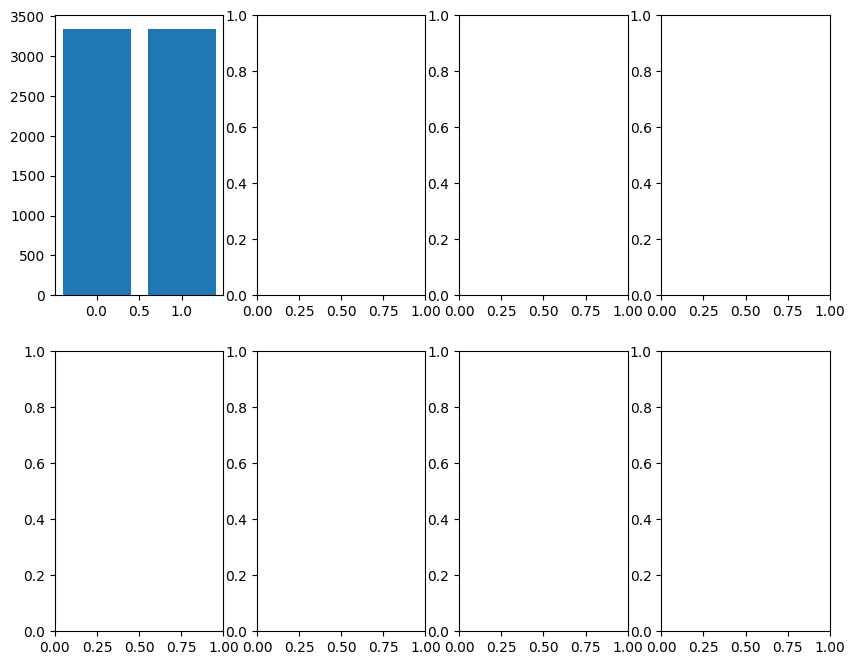

In [24]:
fig, axs = plt.subplots(2, 4, figsize=(10, 8))

for i in range(2):
    for j in range(2):
        for k in range(2):
            axs[i, 2 * j + k].bar(h_states, mask[i, j, k, :])
            axs[i, 2 * j + k].set_title(
                "Previous steps: "
                + str(h_states[i])
                + " "
                + str(h_states[j])
                + " "
                + str(h_states[k])
            )
            axs[i, 2 * j + k].set_xticks(h_states)
            axs[i, 2 * j + k].set_xticklabels(["0", "1"])
            axs[i, 2 * j + k].set_ylabel("Counts")

plt.tight_layout()
plt.show()